In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from typing import List, Optional, Tuple

import corner


In [2]:
from starccato_flow.data.toy_data import ToyData
from starccato_flow.data.ccsn_data import CCSNData
from starccato_flow.data.ccsn_snr_data import CCSNSNRData
from starccato_flow.training.trainer import Trainer

from starccato_flow.plotting.plotting import plot_reconstruction_distribution

MPS device found


/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/tarineccleston/Desktop/starccato/starccato-flow/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from starccato_flow.utils.defaults import DEVICE

### Dataset Plots

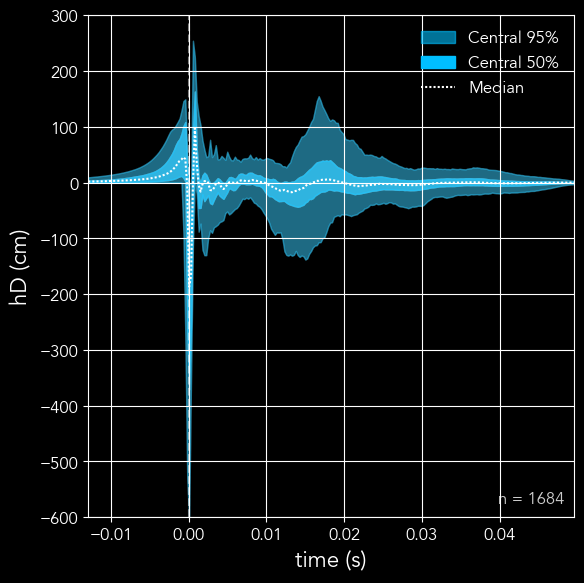

In [4]:
ccsn_dataset = CCSNSNRData(noise=True, curriculum=False)
ccsn_dataset.plot_signal_distribution(background="black", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_distribution.svg")

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


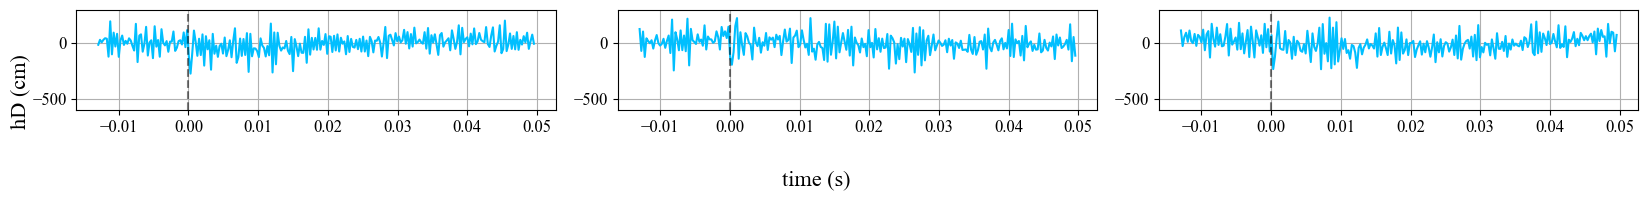

In [25]:
ccsn_dataset.update_snr(8)
ccsn_dataset.plot_signal_grid(background="white", font_family="sans-serif", font_name="Avenir", fname="plots/ccsn_signal_grid.svg")

In [6]:
toy=False

### Train VAE + Flow


Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5

Verifying data alignment:
Number of signals: 1684
Number of parameter sets: 1684
Parameter columns: ['beta1_IC_b', 'A(km)', 'Ye_c_b', 'omega_0(rad|s)']
First few parameter values:
   beta1_IC_b  A(km)  Ye_c_b  omega_0(rad|s)
1    0.000749    634  0.2465             0.5
2    0.002987    634  0.2465             1.0
3    0.006661    634  0.2465             1.5
4    0.011734    634  0.2465             2.0
5    0.017965    634  0.2465             2.5
Training samples: 15156
Validation samples: 1684


Epochs:   0%|          | 0/256 [00:00<?, ?it/s]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:   6%|▌         | 15/256 [07:25<2:01:26, 30.23s/it]

Generated signals shape: (32, 256)


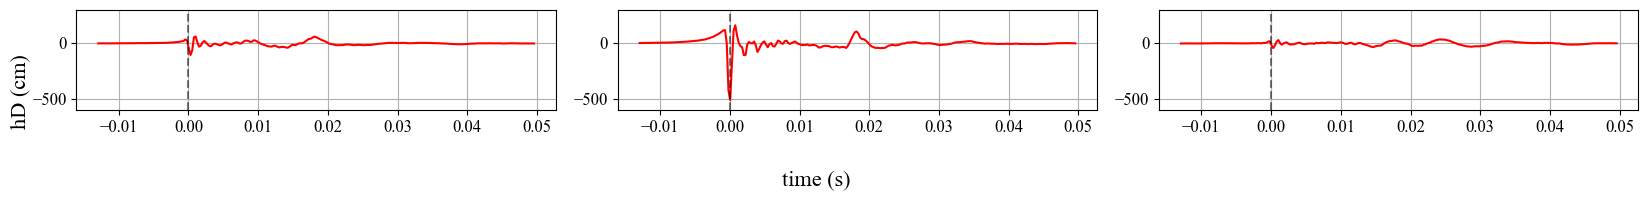

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


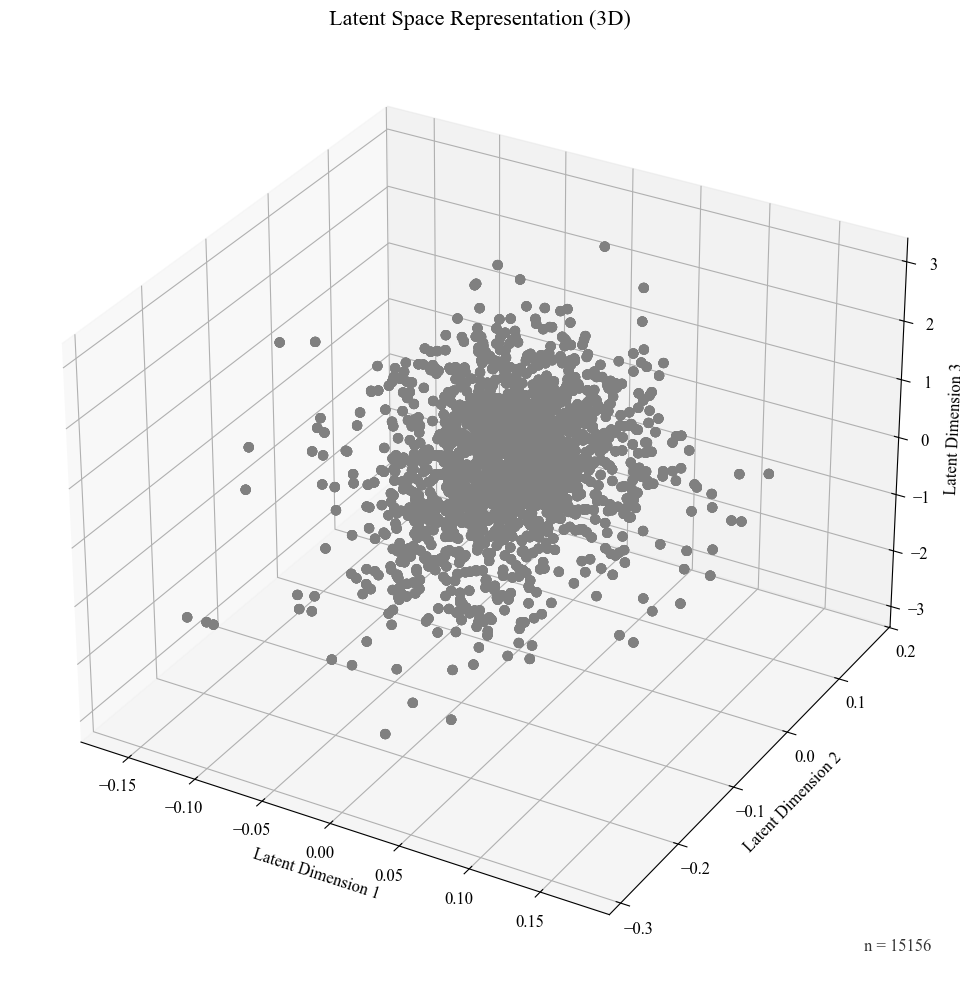

Epochs:   6%|▋         | 16/256 [08:10<2:19:00, 34.75s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  12%|█▏        | 31/256 [15:19<1:47:24, 28.64s/it]

Generated signals shape: (32, 256)


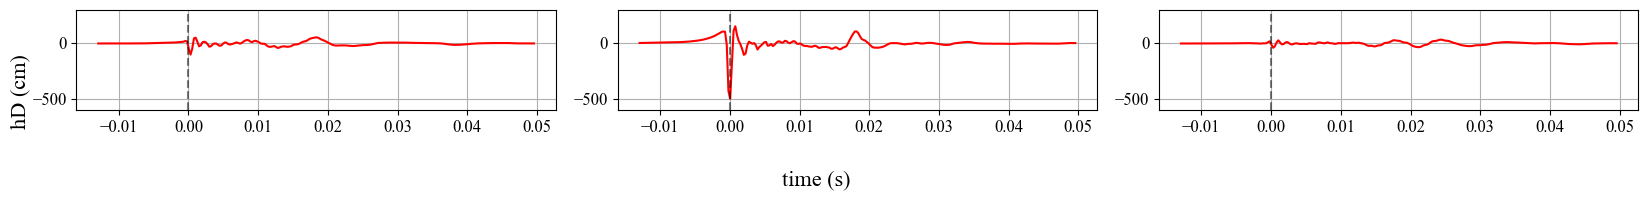

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


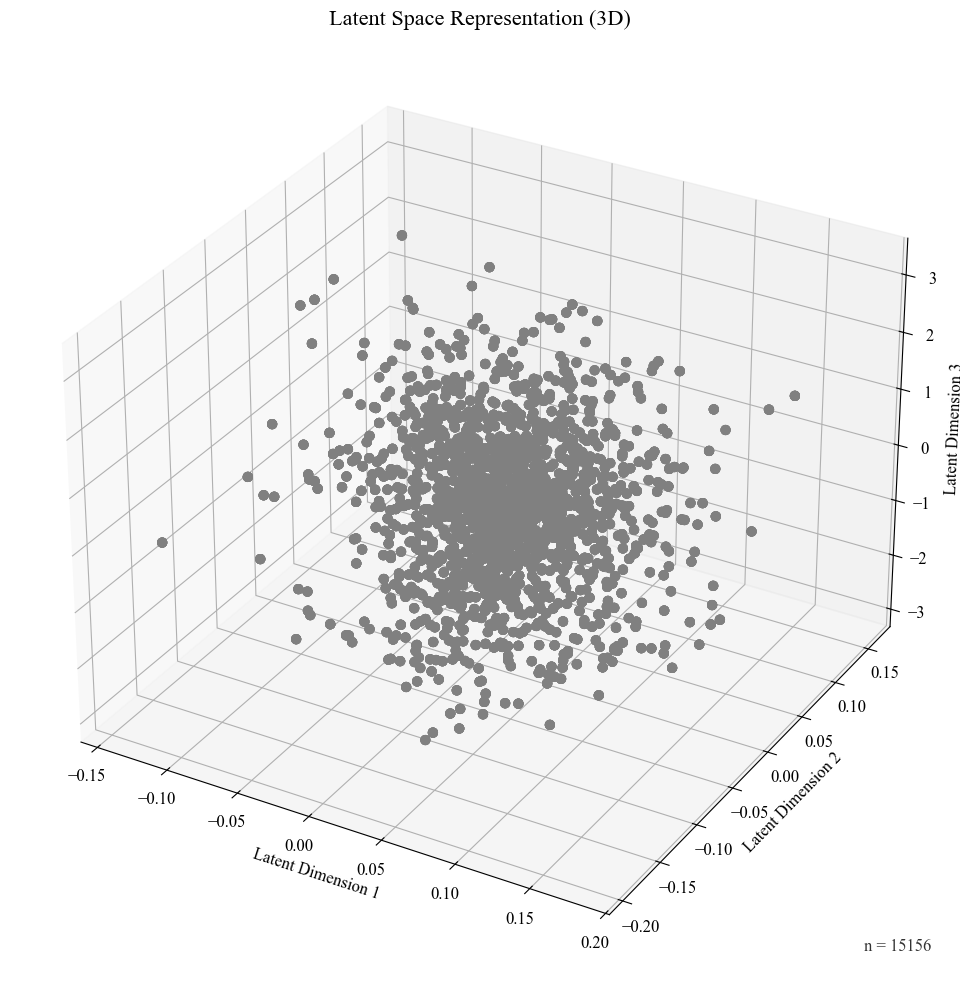

Epochs:  12%|█▎        | 32/256 [16:06<2:08:08, 34.32s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  18%|█▊        | 47/256 [23:13<1:39:05, 28.45s/it]

Generated signals shape: (32, 256)


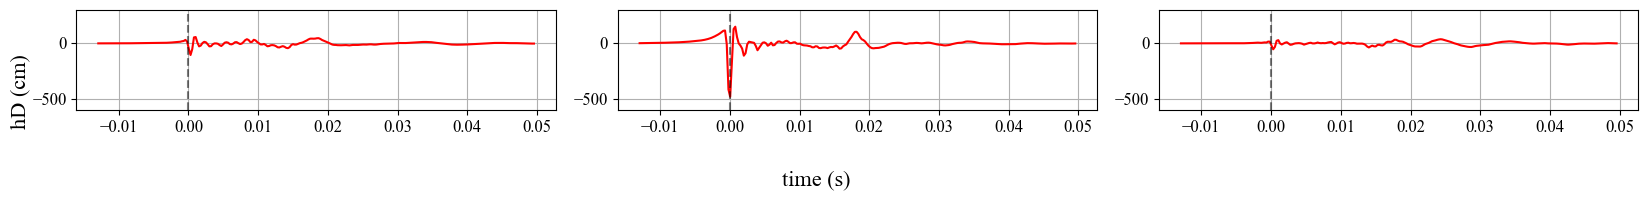

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


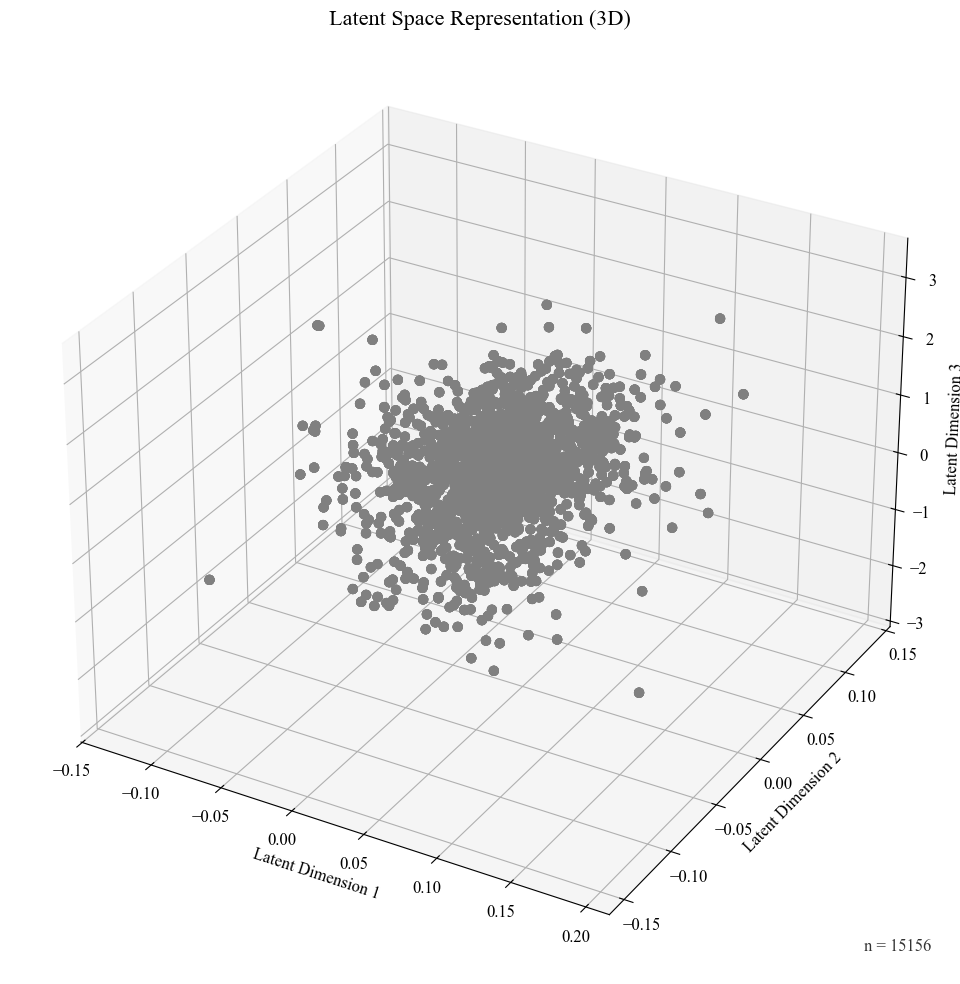

Epochs:  19%|█▉        | 48/256 [24:00<1:57:39, 33.94s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  25%|██▍       | 63/256 [31:14<1:31:54, 28.57s/it]

Generated signals shape: (32, 256)


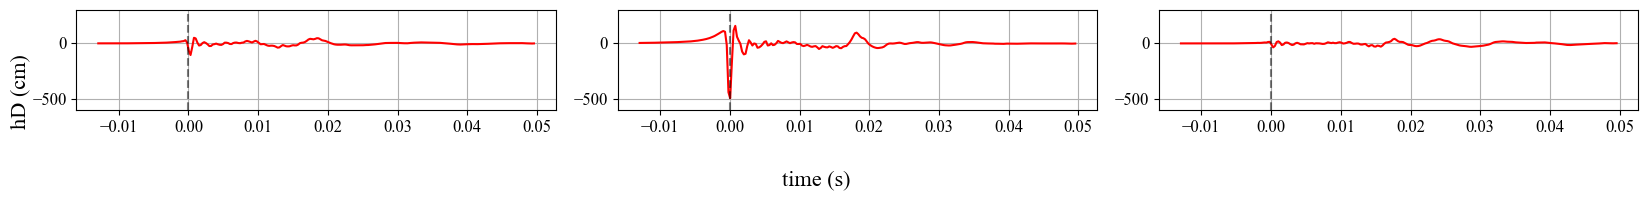

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


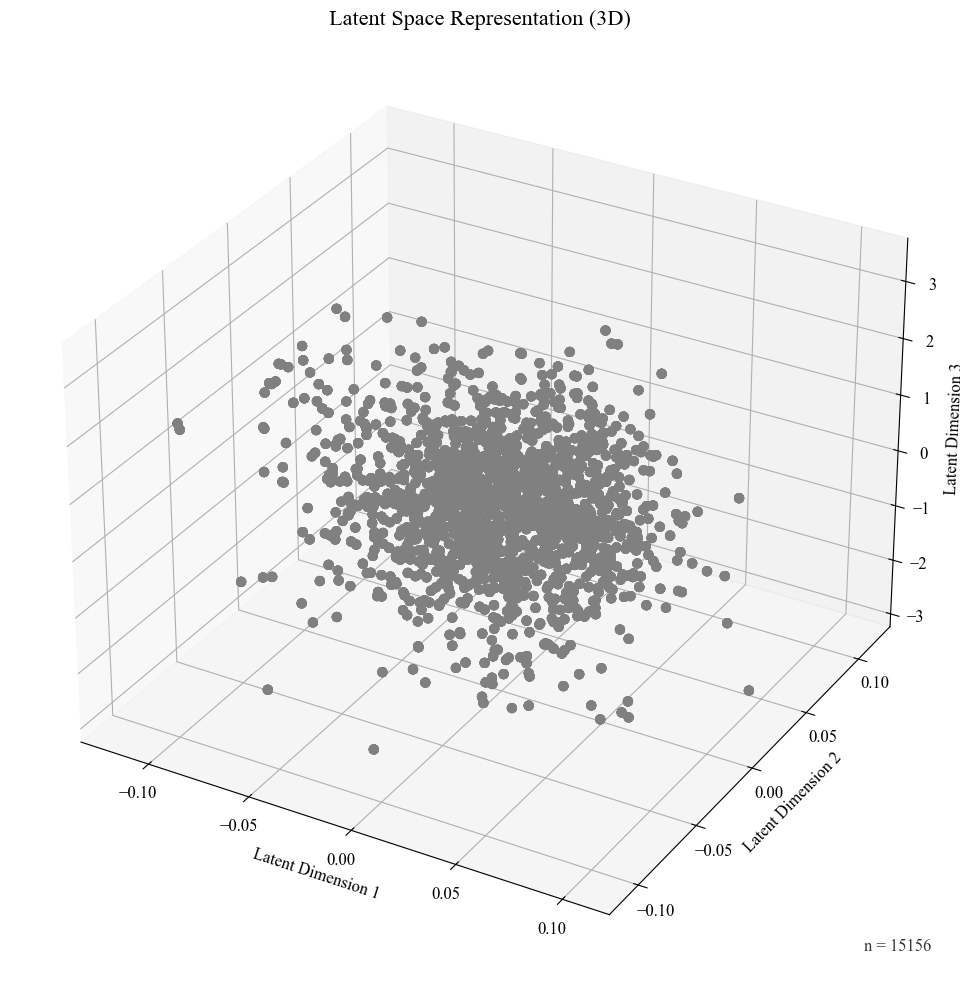

Epochs:  25%|██▌       | 64/256 [31:58<1:46:30, 33.29s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  31%|███       | 79/256 [38:52<1:20:59, 27.46s/it]

Generated signals shape: (32, 256)


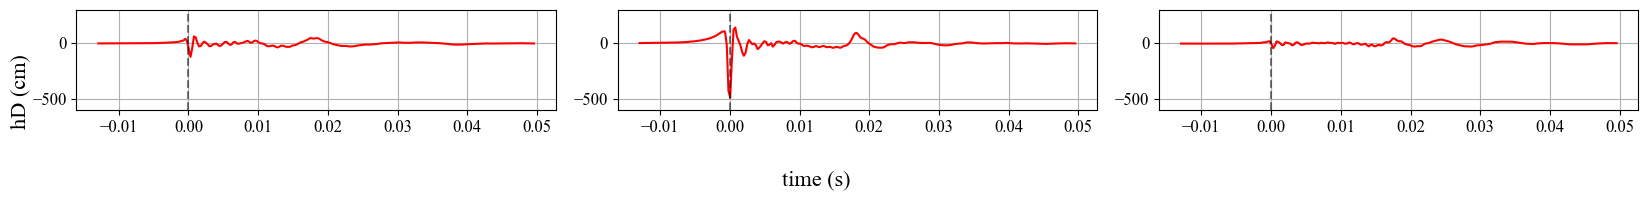

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


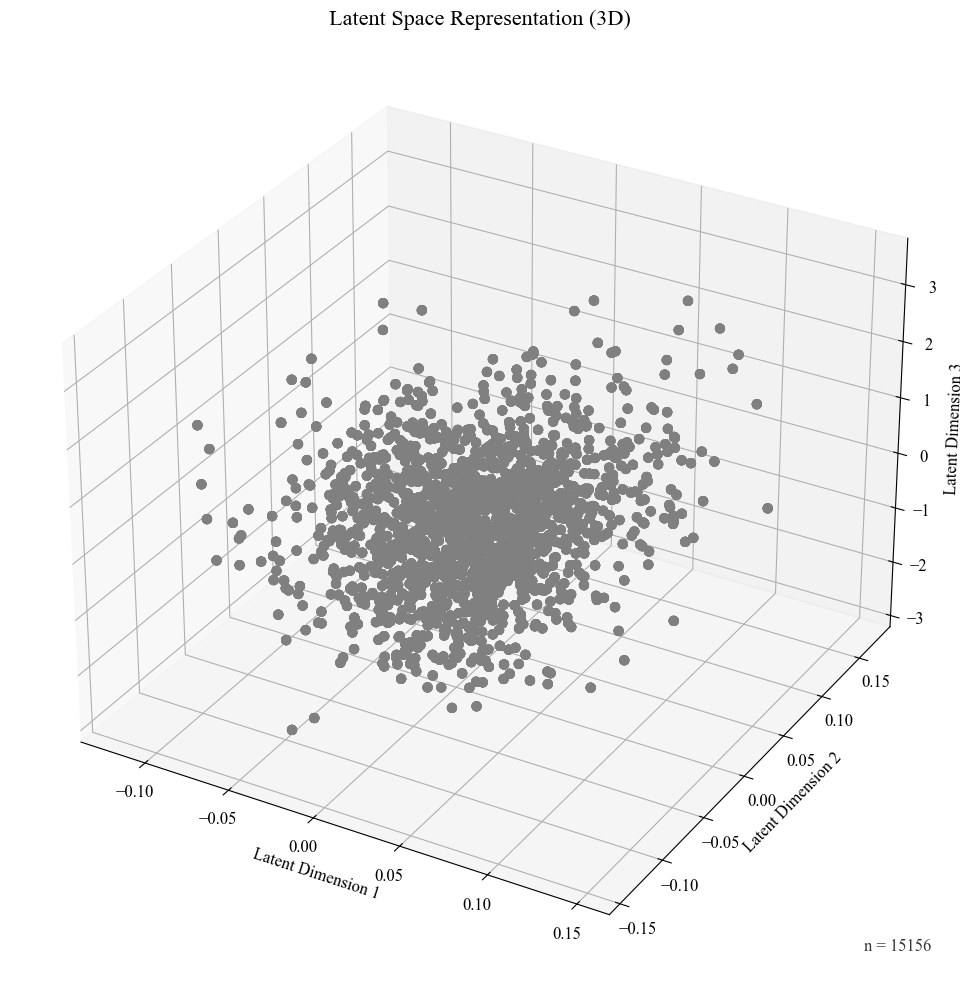

Epochs:  31%|███▏      | 80/256 [39:37<1:35:47, 32.66s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  37%|███▋      | 95/256 [46:32<1:13:29, 27.39s/it]

Generated signals shape: (32, 256)


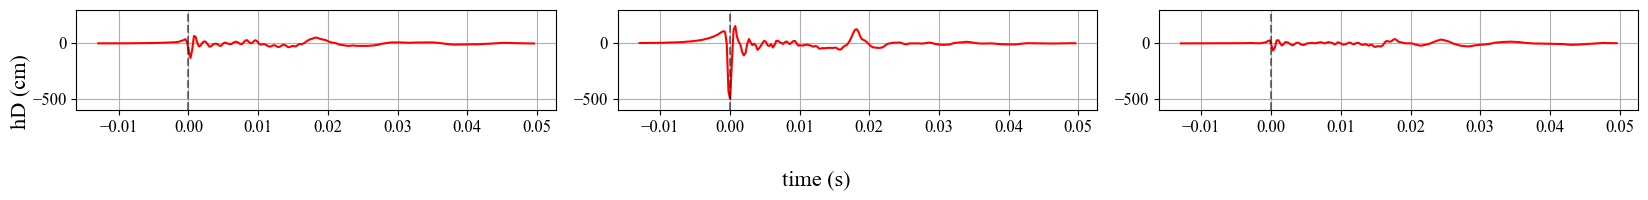

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


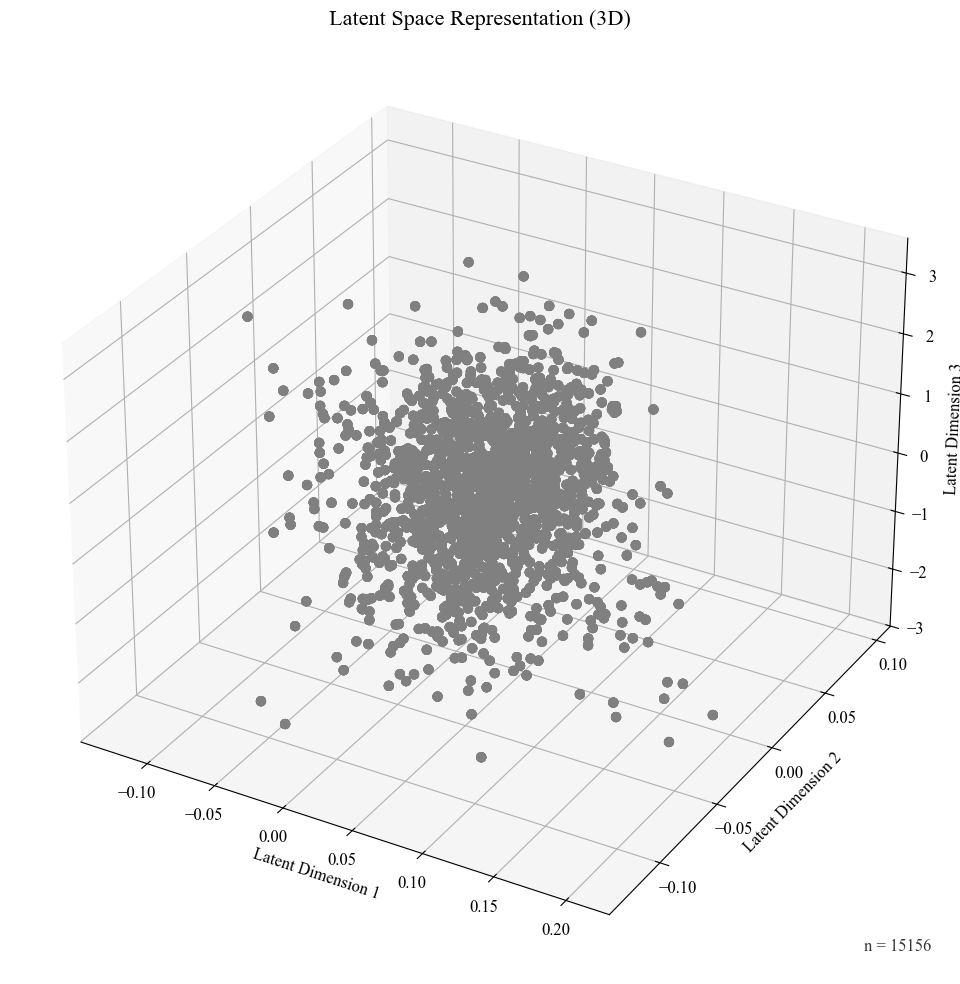

Epochs:  38%|███▊      | 96/256 [47:17<1:26:58, 32.62s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  43%|████▎     | 111/256 [54:24<1:10:56, 29.36s/it]

Generated signals shape: (32, 256)


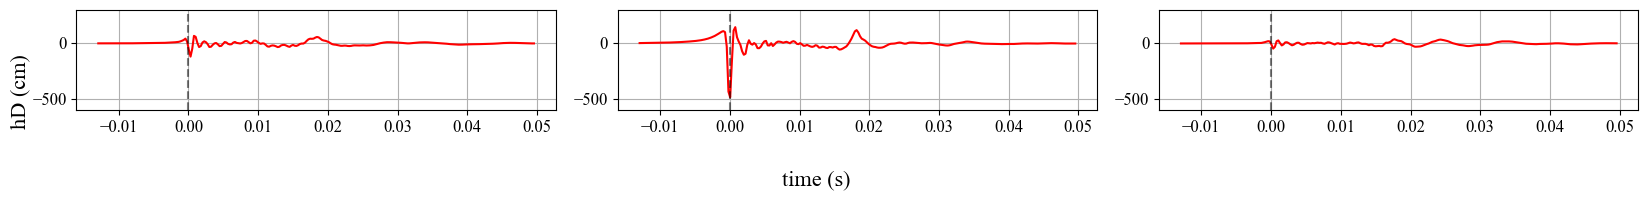

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


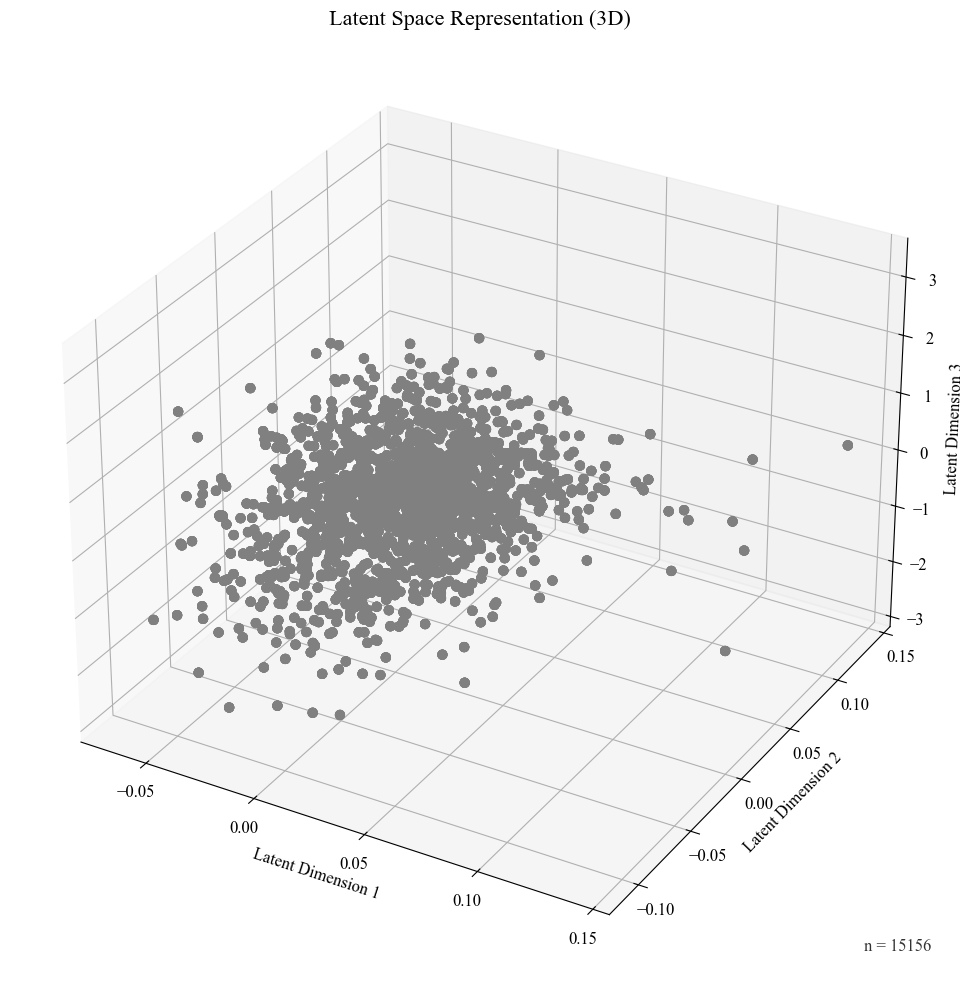

Epochs:  44%|████▍     | 112/256 [55:12<1:23:44, 34.89s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  50%|████▉     | 127/256 [1:02:40<1:04:13, 29.87s/it]

Generated signals shape: (32, 256)


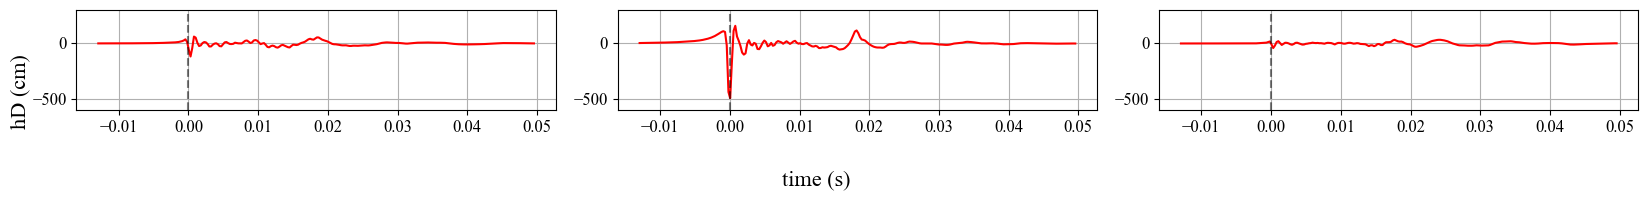

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


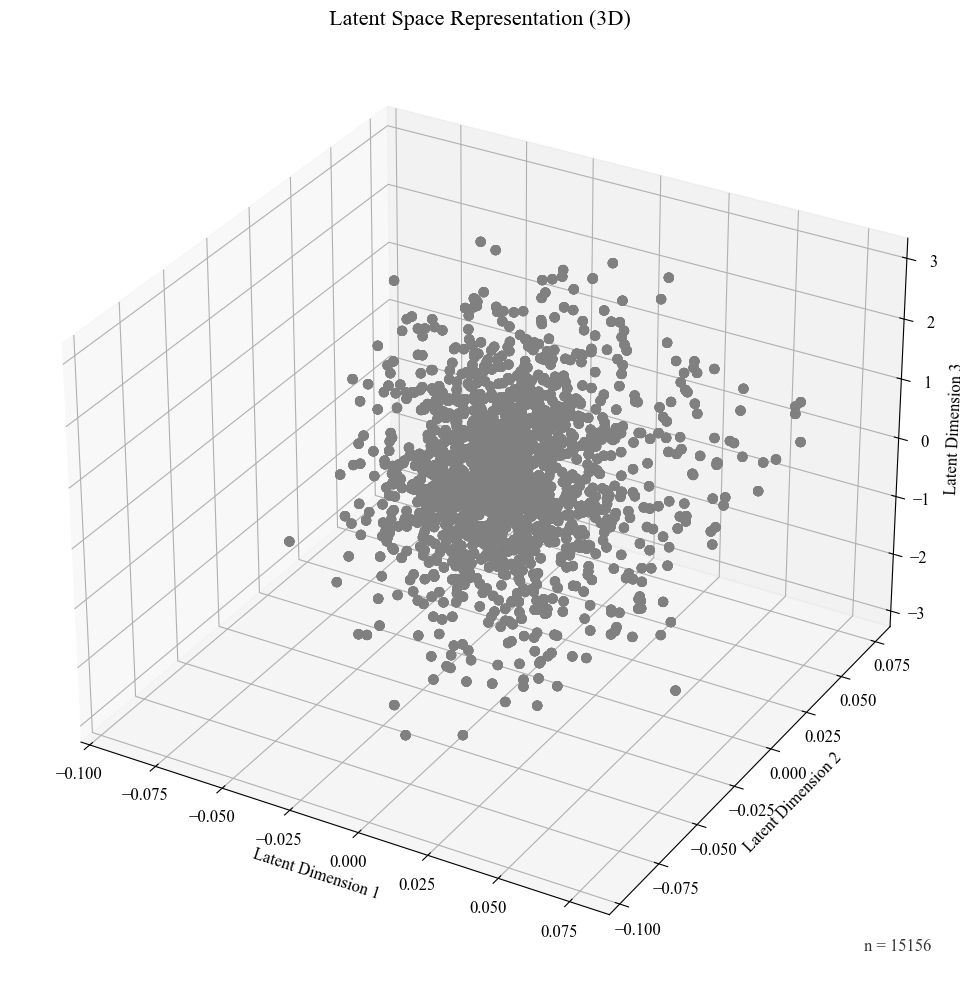

Epochs:  50%|█████     | 128/256 [1:03:28<1:15:40, 35.48s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  56%|█████▌    | 143/256 [1:10:57<56:09, 29.82s/it]  

Generated signals shape: (32, 256)


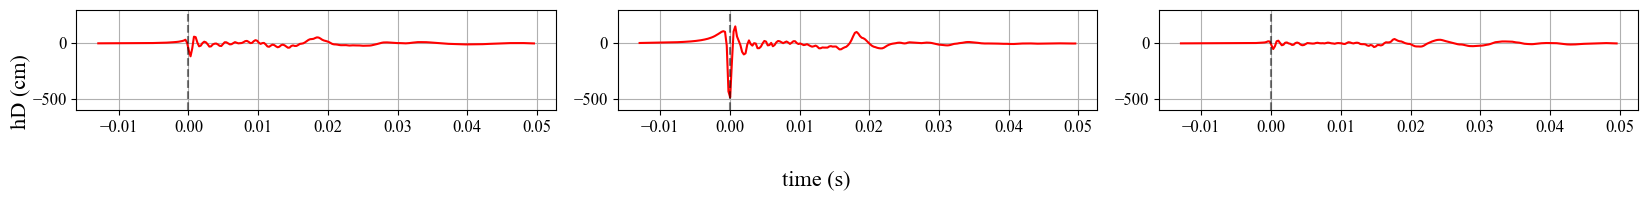

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


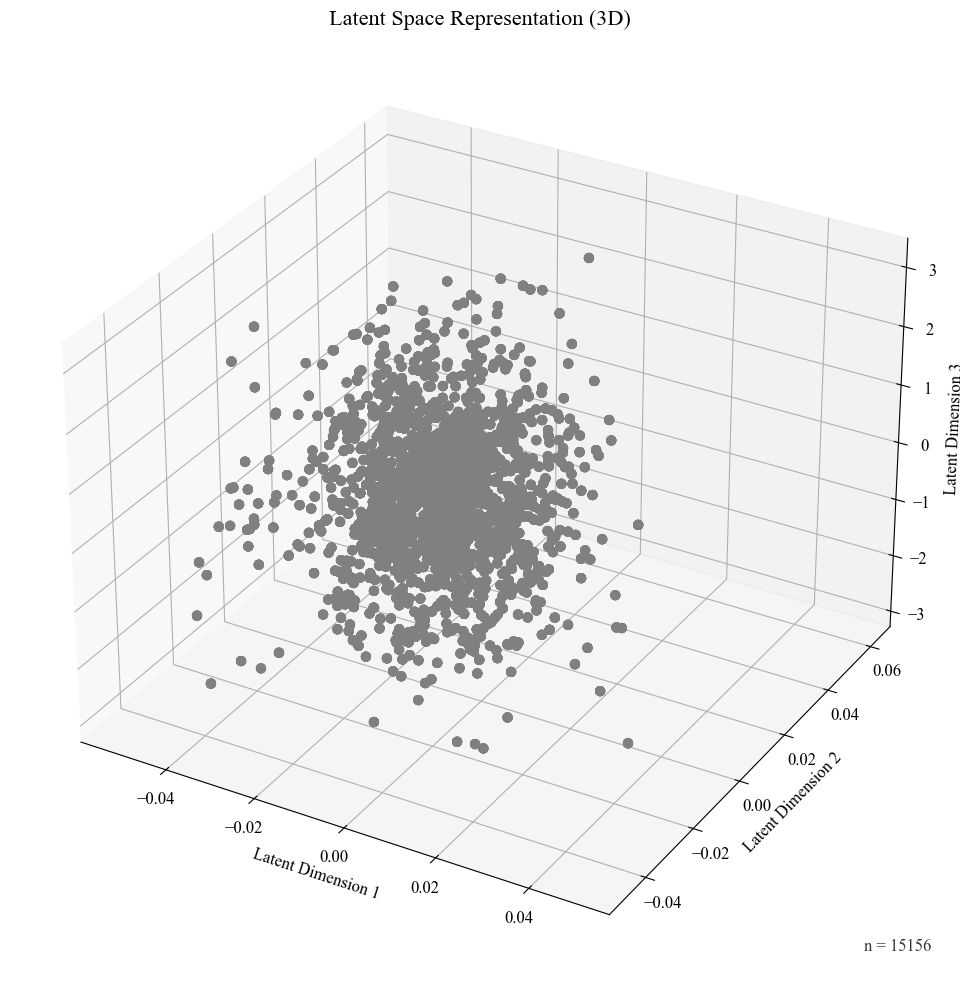

Epochs:  56%|█████▋    | 144/256 [1:11:45<1:06:04, 35.40s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  62%|██████▏   | 159/256 [1:19:15<48:36, 30.06s/it]  

Generated signals shape: (32, 256)


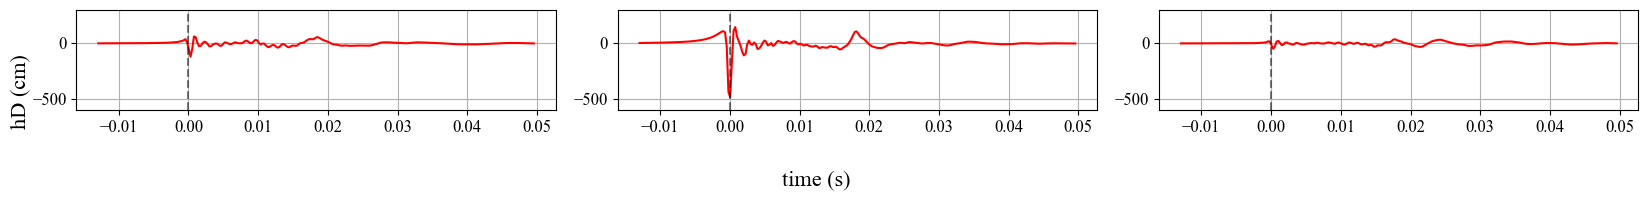

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


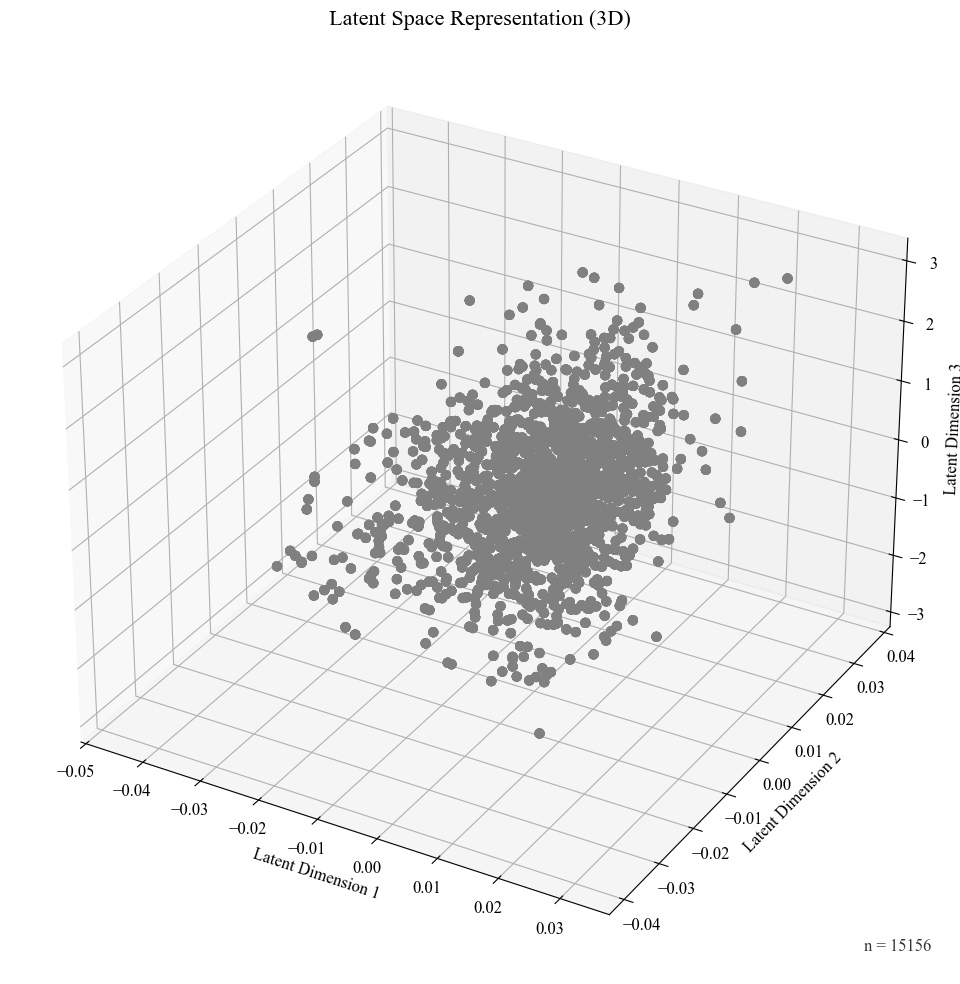

Epochs:  62%|██████▎   | 160/256 [1:20:03<56:55, 35.58s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  68%|██████▊   | 175/256 [1:27:32<40:50, 30.26s/it]

Generated signals shape: (32, 256)


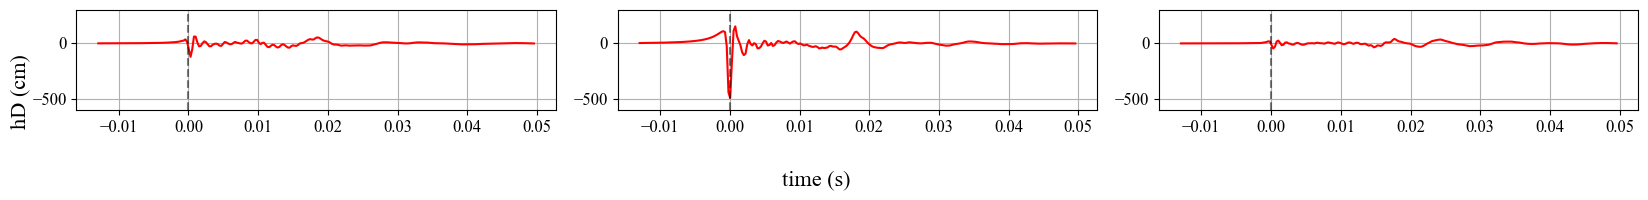

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


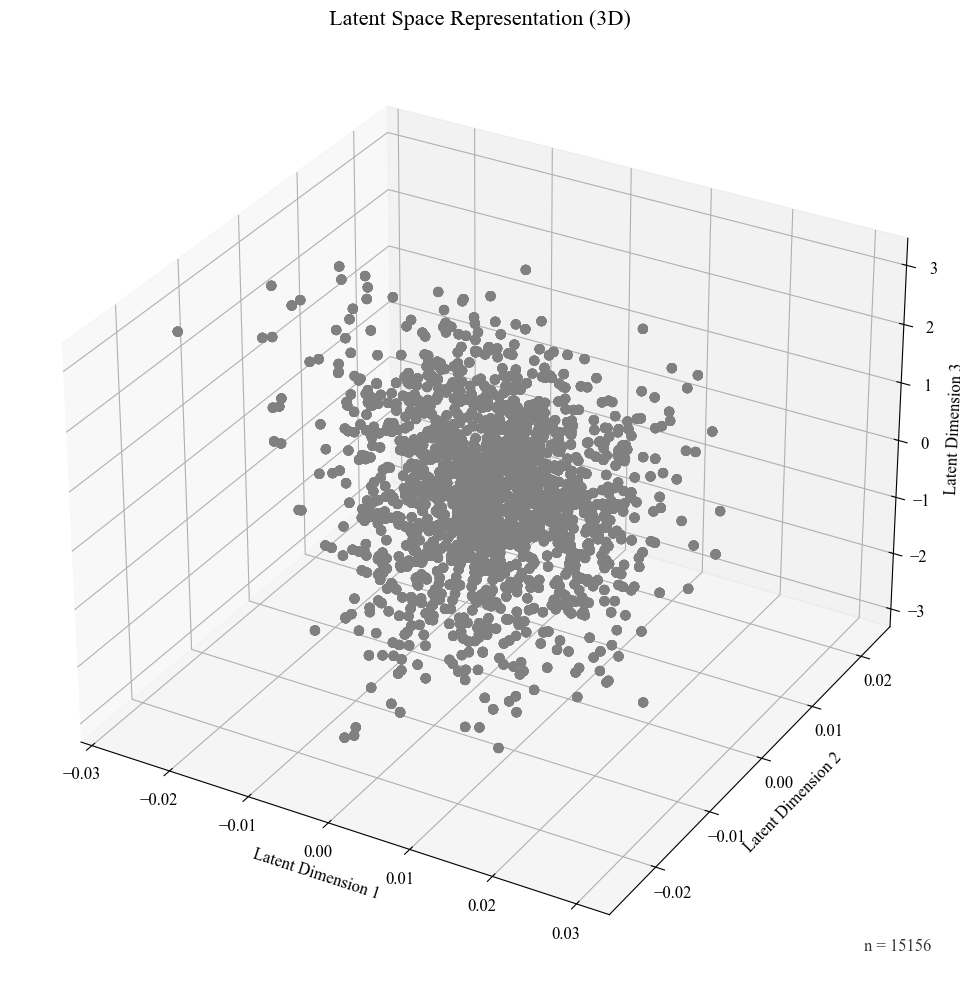

Epochs:  69%|██████▉   | 176/256 [1:28:18<46:45, 35.07s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  75%|███████▍  | 191/256 [1:35:21<31:21, 28.94s/it]

Generated signals shape: (32, 256)


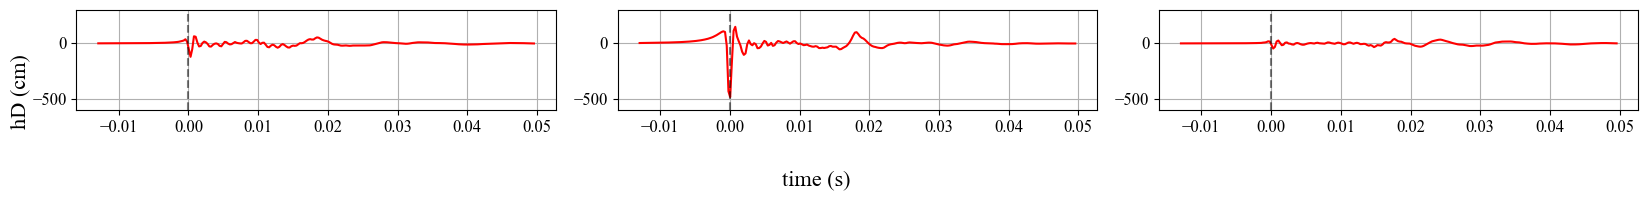

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


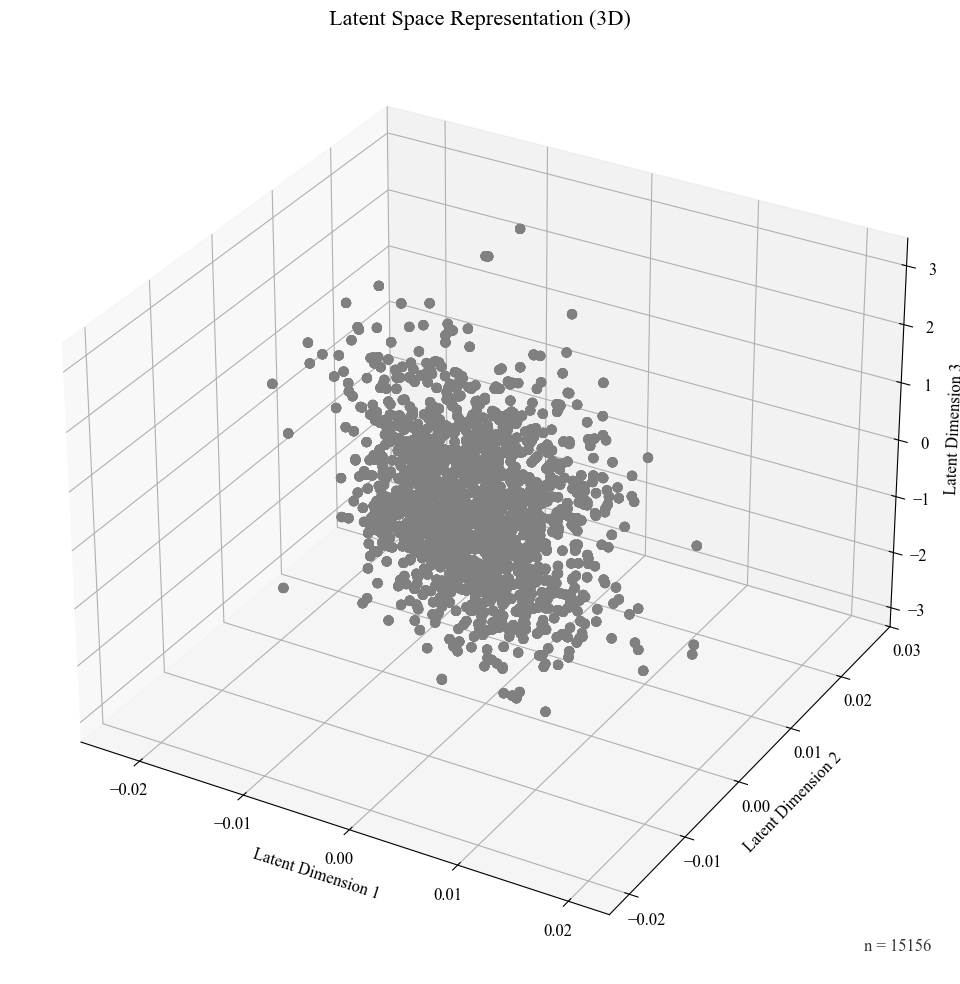

Epochs:  75%|███████▌  | 192/256 [1:36:08<36:55, 34.61s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  81%|████████  | 207/256 [1:43:00<22:36, 27.69s/it]

Generated signals shape: (32, 256)


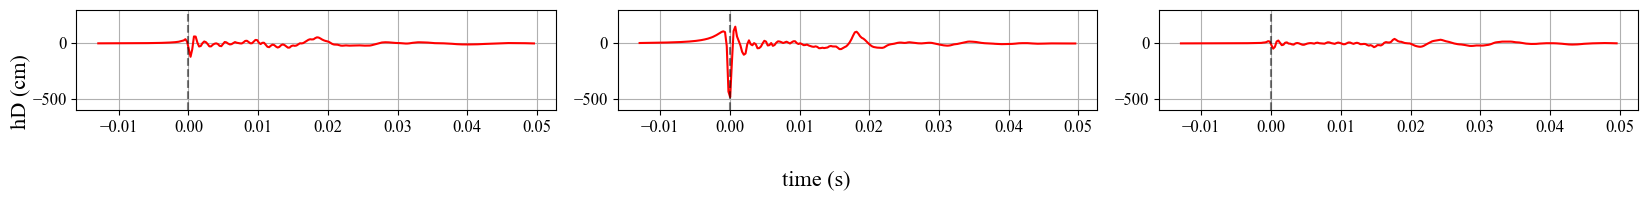

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


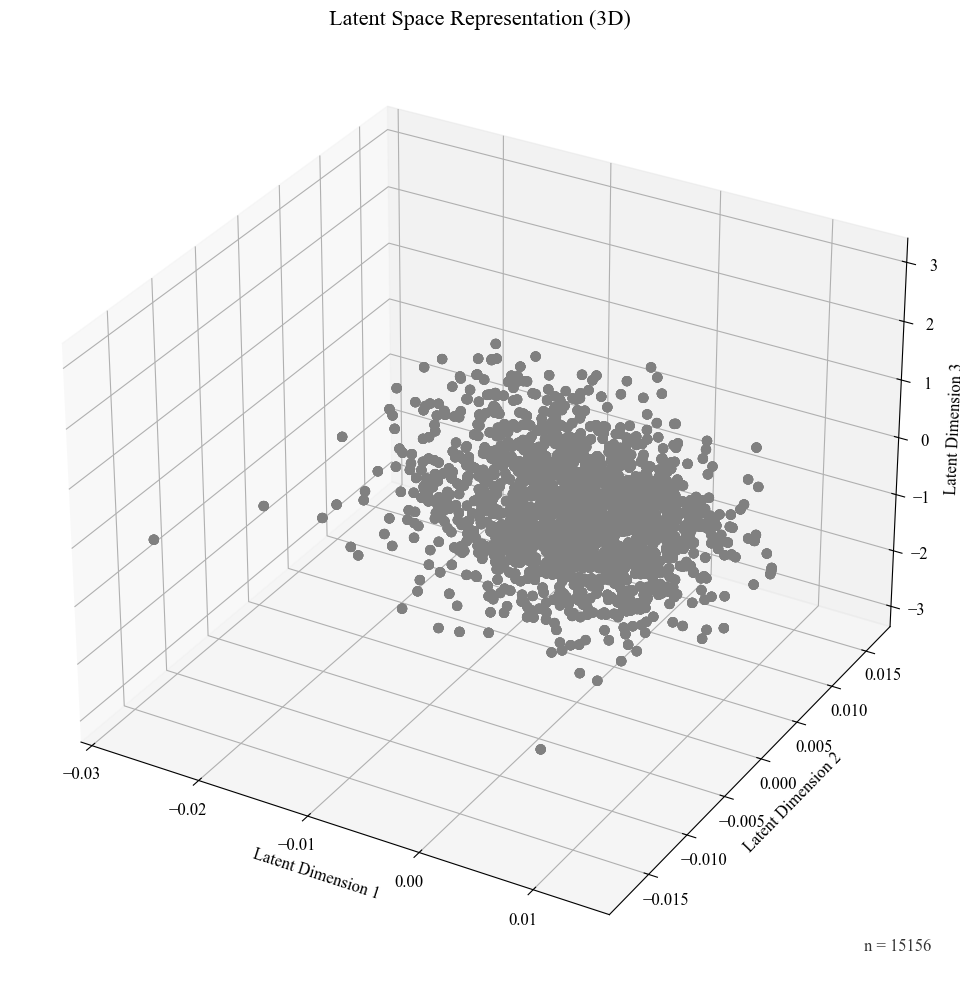

Epochs:  81%|████████▏ | 208/256 [1:43:46<26:31, 33.16s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  87%|████████▋ | 223/256 [1:50:51<15:37, 28.41s/it]

Generated signals shape: (32, 256)


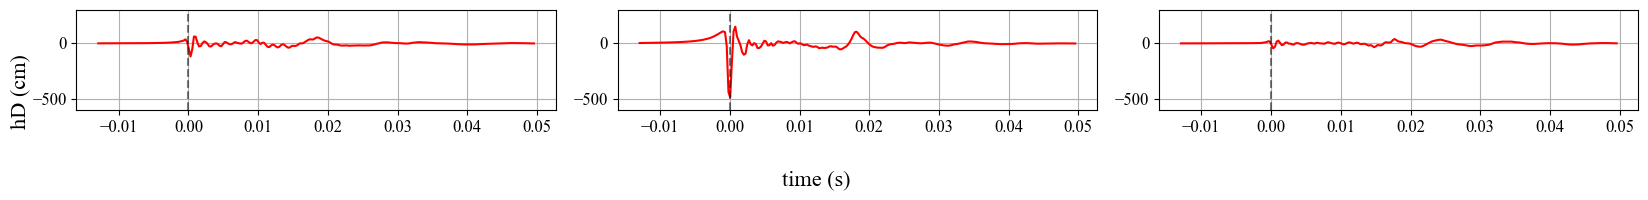

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


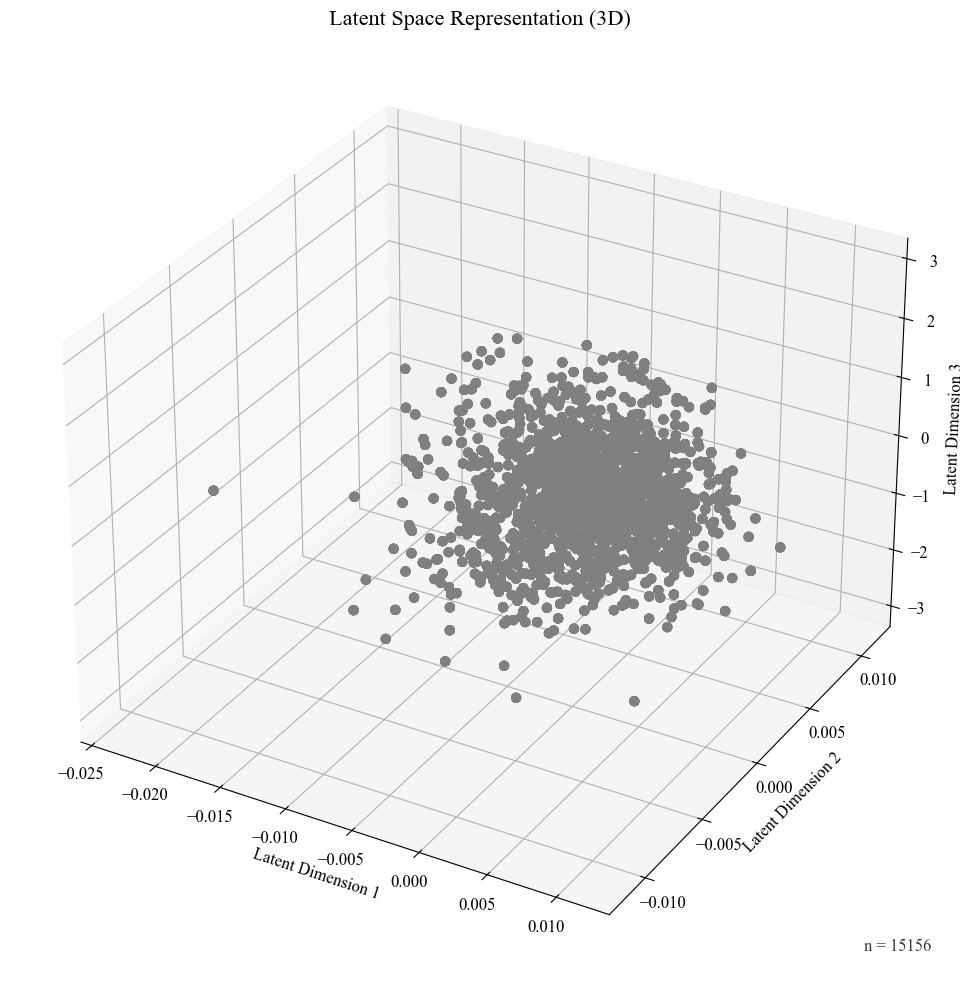

Epochs:  88%|████████▊ | 224/256 [1:51:38<18:02, 33.82s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs:  93%|█████████▎| 239/256 [1:58:43<07:58, 28.14s/it]

Generated signals shape: (32, 256)


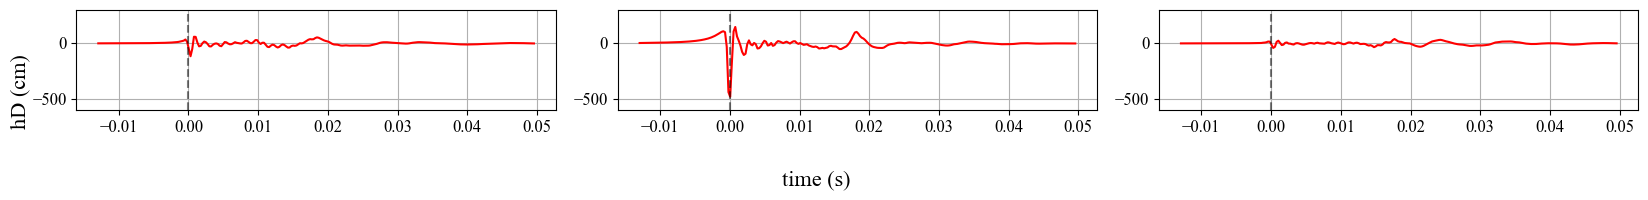

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


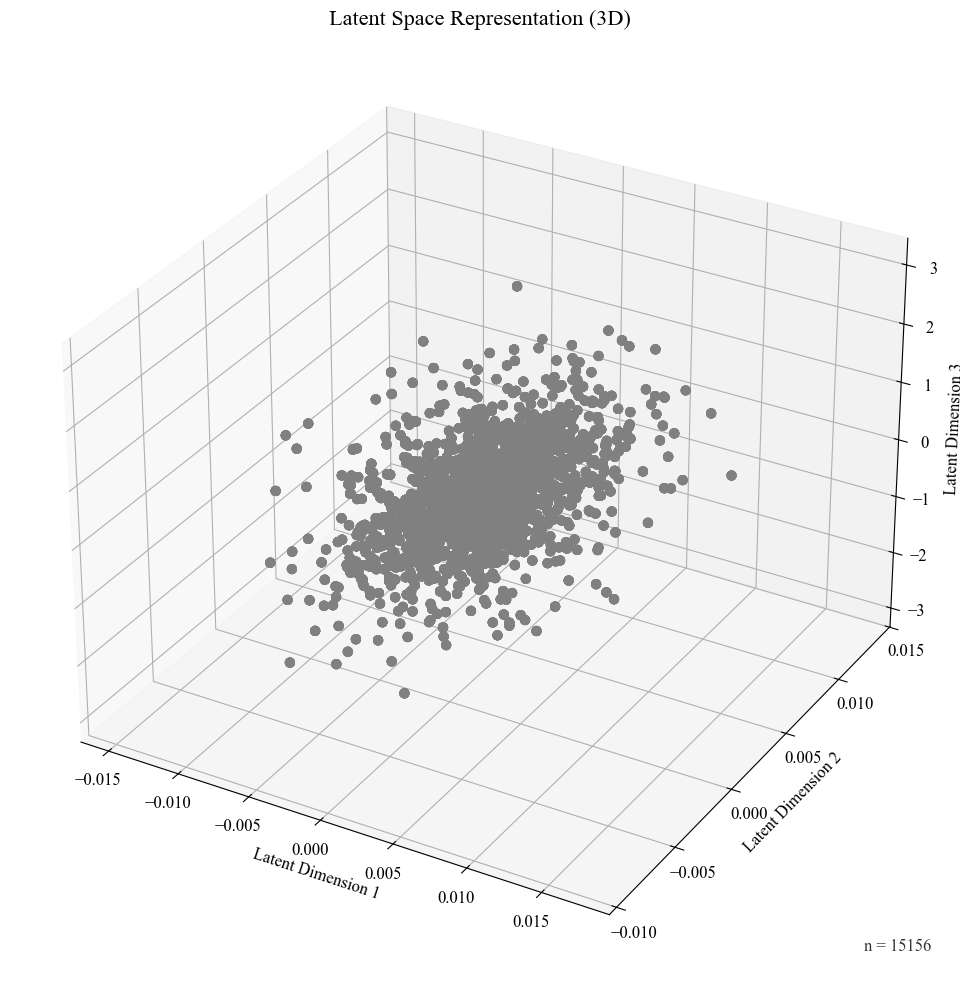

Epochs:  94%|█████████▍| 240/256 [1:59:30<08:59, 33.70s/it]/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
Epochs: 100%|█████████▉| 255/256 [2:06:36<00:28, 28.35s/it]

Generated signals shape: (32, 256)


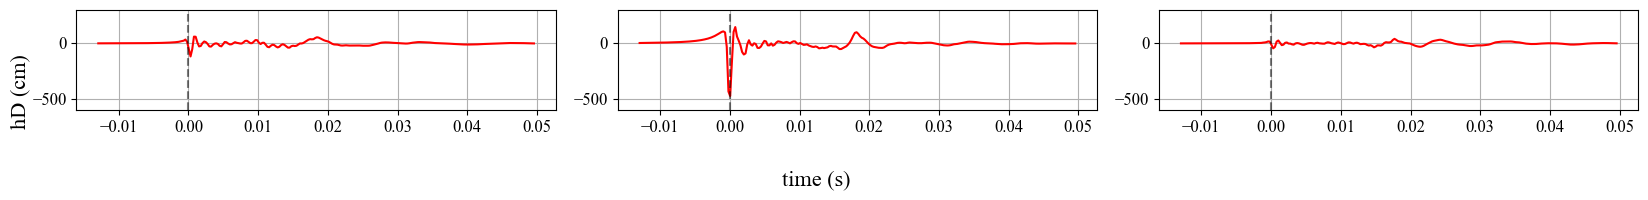

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


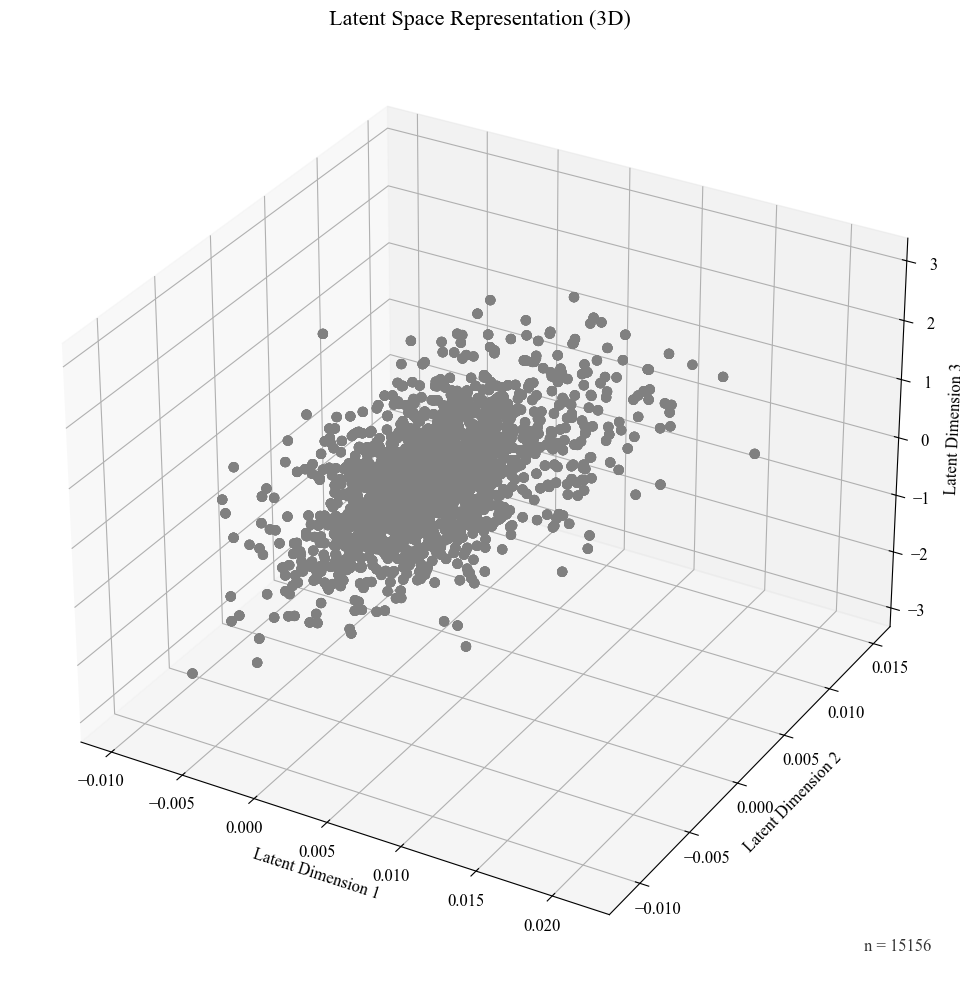

Epochs: 100%|██████████| 256/256 [2:07:23<00:00, 29.86s/it]


Training Time: 127.39min
Saved VAE model to outdir/generator_weights.pt

Starting Flow Training


/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


Epoch [1/500] | Flow Train NLL: 3.8280 | Val NLL: 0.0253 ✓ (Best)
Epoch [2/500] | Flow Train NLL: 0.1445 | Val NLL: -0.0157 ✓ (Best)
Epoch [3/500] | Flow Train NLL: -0.6605 | Val NLL: -0.0171 ✓ (Best)
Epoch [4/500] | Flow Train NLL: -1.0153 | Val NLL: -0.0413 ✓ (Best)
Epoch [5/500] | Flow Train NLL: -1.4043 | Val NLL: -0.0523 ✓ (Best)
Epoch [6/500] | Flow Train NLL: -1.6931 | Val NLL: -0.0250 (Patience: 1/50)
Epoch [7/500] | Flow Train NLL: -1.8304 | Val NLL: -0.0662 ✓ (Best)
Epoch [8/500] | Flow Train NLL: -2.0917 | Val NLL: -0.0772 ✓ (Best)
Epoch [9/500] | Flow Train NLL: -2.1331 | Val NLL: -0.0573 (Patience: 1/50)
Epoch [10/500] | Flow Train NLL: -2.3358 | Val NLL: -0.0842 ✓ (Best)
Epoch [11/500] | Flow Train NLL: -2.4668 | Val NLL: -0.0475 (Patience: 1/50)
Epoch [12/500] | Flow Train NLL: -2.5481 | Val NLL: -0.0761 (Patience: 2/50)
Epoch [13/500] | Flow Train NLL: -2.7308 | Val NLL: -0.0685 (Patience: 3/50)
Epoch [14/500] | Flow Train NLL: -2.8601 | Val NLL: -0.0869 ✓ (Best)
Epoch 

In [7]:
# Train with 3 noise realizations = 3x more data!
# This should significantly improve validation NLL
trainer = Trainer(
    toy=toy, 
    start_snr=100,
    end_snr=10,
    noise=True, 
    curriculum=True,
    noise_realizations=10
)
trainer.train()

### Display Results

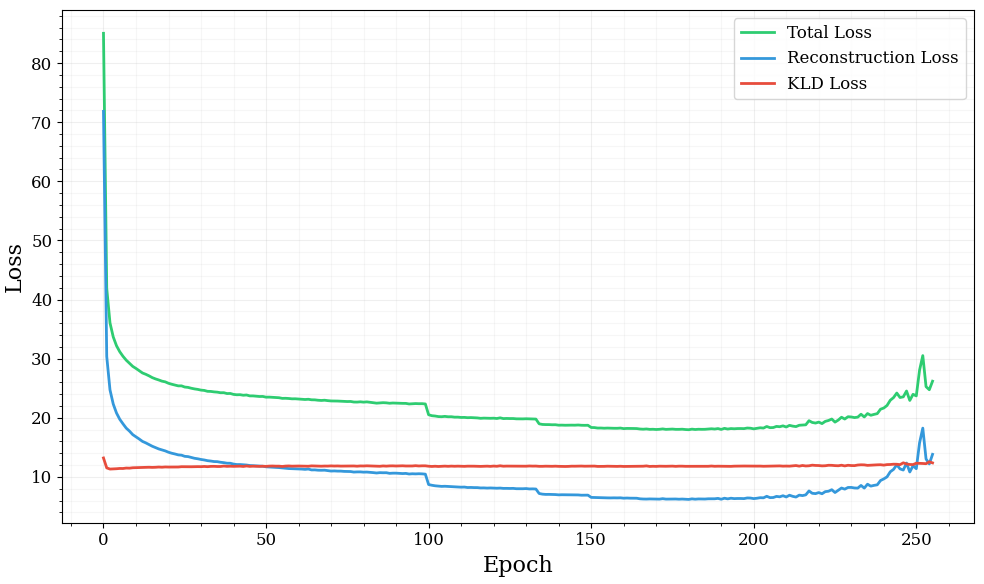

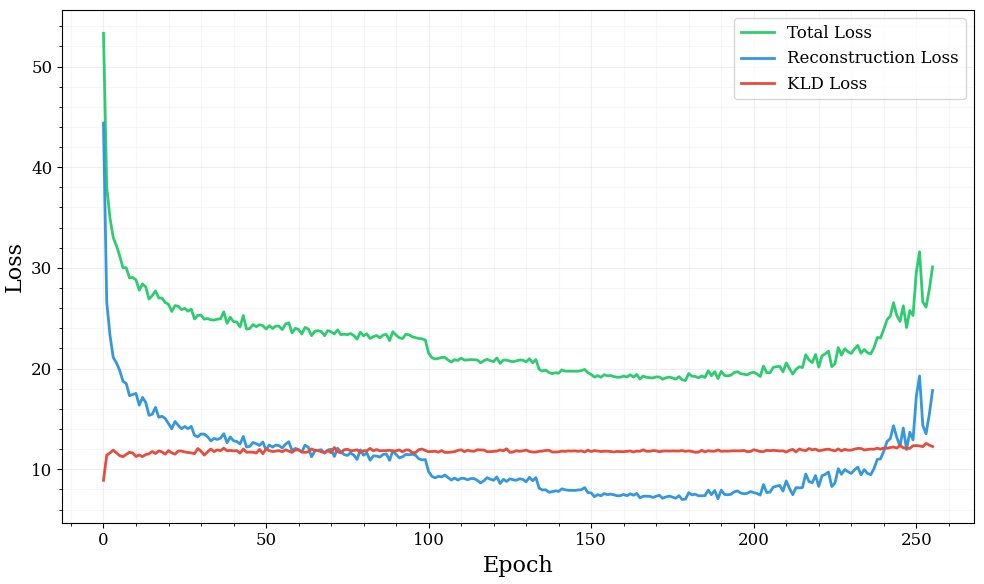

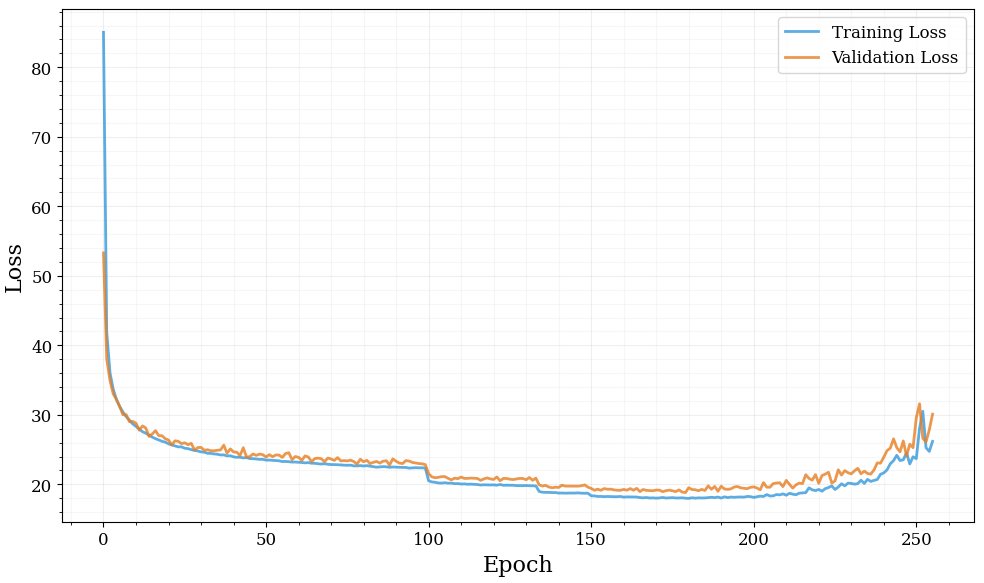

In [8]:
trainer.display_results()

In [9]:
# plot_latent_morph_up_and_down(
#     trainer.vae,
#     signal_1=ccsn_dataset.__getitem__(800)[0],
#     signal_2=ccsn_dataset.__getitem__(600)[0],
#     max_value=trainer.training_dataset.max_strain,
#     train_dataset=CCSNData(),
#     steps=1
# )

Execution Time: 0.3232259750366211 seconds


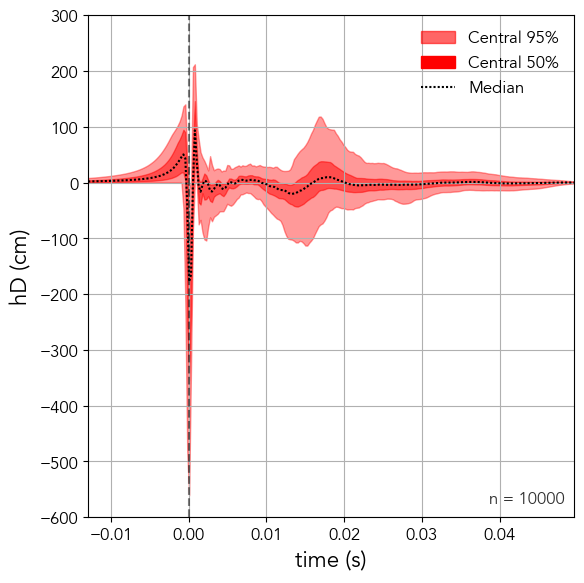

In [10]:
trainer.plot_generated_signal_distribution(
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


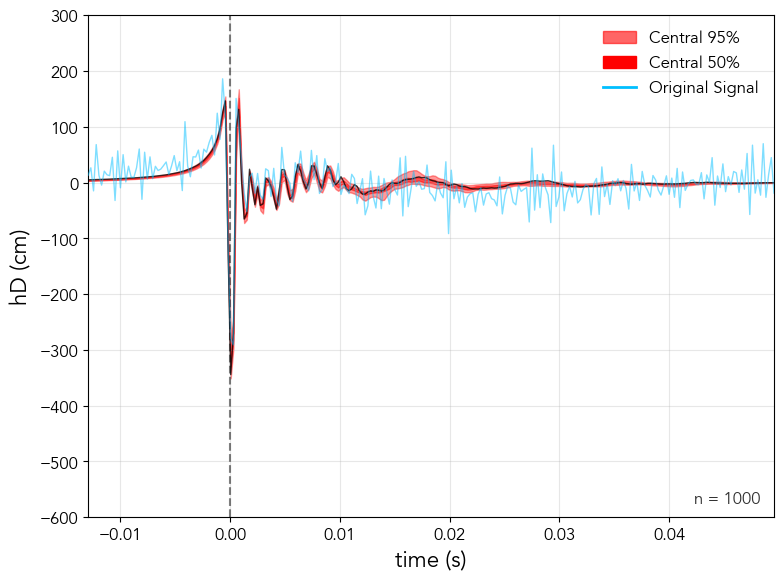

In [11]:
index = 9

val_idx = trainer.validation_sampler.indices[index]
signal, noisy_signal, params = trainer.val_loader.dataset.__getitem__(val_idx)

plot_reconstruction_distribution(
    vae=trainer.vae,
    noisy_signal=noisy_signal,
    true_signal=signal,
    max_value=trainer.validation_dataset.max_strain,
    num_samples=1000,
    background="white",
    font_family="sans-serif",
    font_name="Avenir"
)

In [12]:
trainer.save_models()

Saved VAE model to outdir/generator_weights.pt


/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in power
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: divide by zero encountered in divide
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))
/Users/tarineccleston/Desktop/starccato/starccato-flow/src/starccato_flow/data/ccsn_snr_data.py:382: RuntimeWarning: invalid value encountered in subtract
  psd = 1e-49 * (pow(x, - 4.14) - 5 / x2 + 111 * (1 - x2 + 0.5 * x2 * x2) / (1 + 0.5 * x2))


True params: tensor([0.0293, 6.1463, 0.2758, 3.5000])
[0.02927279 6.1463294  0.27582988 3.5       ]


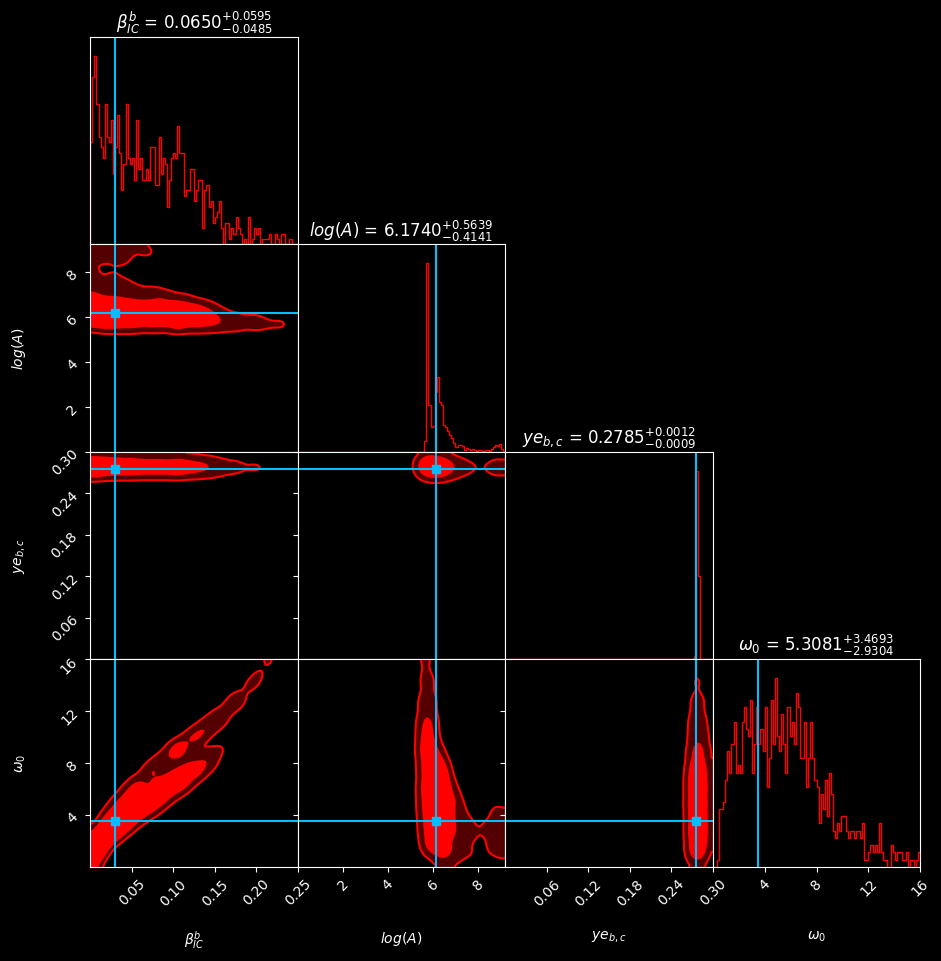

In [30]:
trainer.validation_dataset.set_epoch(256)
trainer.plot_corner(index=130)